## Generating Customers, Terminals and Transactions Data
We here generate a dataset of legitimate and fraudulent transactions.

In [1]:
!pip install pandas --upgrade

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
import seaborn as sns
import os
import datetime
from functions import *

In [3]:
NUMBER_OF_CUSTOMERS = 5000
NUMBER_OF_TERMINALS = 10000
RANDOM_STATE_CUSTOMERS = random.randint(0,1000000)
RANDOM_STATE_TERMINALS = random.randint(0,1000000)
RADIUS = 5
NUMBER_OF_DAYS = 183
START_DATE = "2021-07-01"
# DIR_OUTPUT = "../data/generated/"
BASE_S3_PATH = 's3://sagemaker-us-east-1-996912938507/endtoendmlsm/data/generated/'

#### Generating Data

We here generate three dataframes:
- `customers_df`
- `terminals_df`
- `transactions_df`

In [4]:
(customers_df, terminals_df, transactions_df )=\
    generate_dataset(NUMBER_OF_CUSTOMERS, 
                     NUMBER_OF_TERMINALS, 
                     NUMBER_OF_DAYS, 
                     START_DATE,
                     RADIUS,
                     RANDOM_STATE_CUSTOMERS,
                     RANDOM_STATE_TERMINALS)

Generating customers
Generated 5000 customers

Generating terminals
Generated 10000 terminals

Associating terminals to customers
Associated terminals to customers

Generating transactions

Generated 1759963 transactions

Adding frauds
Number of frauds from scenario 1: 1162
Number of frauds from scenario 2: 8900
Number of frauds from scenario 3: 4624
Fraudulent transactions: 14686/1759963 : 0.8%
Added frauds


In [5]:
customers_df

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,35.829982,90.185773,14.824343,7.412171,0.771698,"[258, 398, 472, 628, 1190, 1292, 1319, 1413, 1...",61
1,1,90.825638,11.079163,35.846852,17.923426,1.732457,"[96, 189, 193, 247, 255, 288, 343, 366, 848, 9...",86
2,2,56.857375,99.681162,67.701084,33.850542,1.599935,"[588, 753, 1097, 1138, 1269, 1377, 1523, 2145,...",35
3,3,80.912795,70.320076,81.604581,40.802291,0.093972,"[70, 133, 150, 182, 226, 564, 879, 891, 896, 9...",71
4,4,72.434431,43.858180,93.165629,46.582815,1.879310,"[118, 325, 566, 599, 795, 925, 999, 1341, 1364...",74
...,...,...,...,...,...,...,...,...
4995,4995,92.569142,96.904566,28.707903,14.353952,1.299162,"[119, 334, 415, 487, 576, 643, 706, 1072, 1094...",80
4996,4996,19.085564,1.034923,89.024965,44.512483,1.563726,"[209, 228, 251, 389, 393, 618, 871, 1145, 1379...",39
4997,4997,35.771524,3.811169,48.409851,24.204925,2.239621,"[216, 310, 331, 382, 548, 777, 1051, 1155, 120...",70
4998,4998,54.472768,80.543560,13.085694,6.542847,2.438133,"[123, 222, 584, 663, 742, 953, 1149, 1704, 177...",83


In [6]:
terminals_df

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,40.644159,95.367082
1,1,64.678788,2.436076
2,2,7.702461,49.114583
3,3,84.452620,37.914027
4,4,24.245783,86.623344
...,...,...,...
9995,9995,34.410669,12.731071
9996,9996,67.763470,83.921257
9997,9997,8.082435,86.231470
9998,9998,73.754768,42.301232


In [7]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2021-07-01 00:00:30,356,801,34.24,30,0,0,0
1,1,2021-07-01 00:01:59,3305,8524,61.92,119,0,0,0
2,2,2021-07-01 00:07:04,1565,9303,136.92,424,0,0,0
3,3,2021-07-01 00:07:56,2,1138,123.23,476,0,0,0
4,4,2021-07-01 00:09:29,4128,6775,80.12,569,0,0,0
...,...,...,...,...,...,...,...,...,...
1759958,1759958,2021-12-30 23:56:48,4253,7584,18.60,15811008,182,0,0
1759959,1759959,2021-12-30 23:57:22,3336,7224,36.85,15811042,182,0,0
1759960,1759960,2021-12-30 23:57:29,1240,4124,62.88,15811049,182,0,0
1759961,1759961,2021-12-30 23:57:58,1493,577,32.89,15811078,182,0,0


We now save the data we just generated

In [8]:
save_data(customers_df, terminals_df, transactions_df, BASE_S3_PATH)

Saving customers
Saved customers
Saving terminals
Saved terminals
Saving transactions
Saved transactions
Done saving data


We now plot some statistics on the generated data

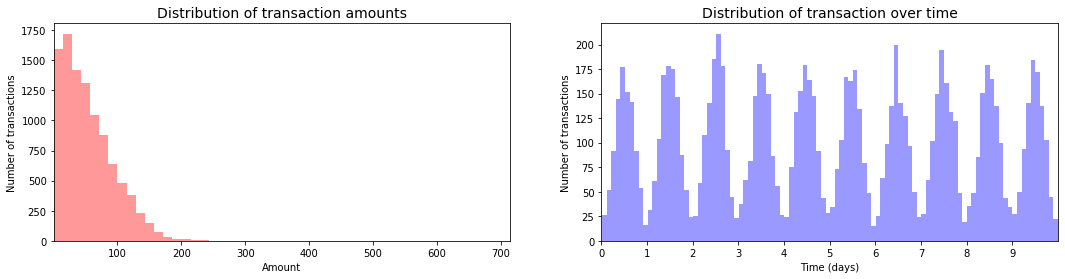

In [9]:
plot_transactions_over_time(transactions_df)

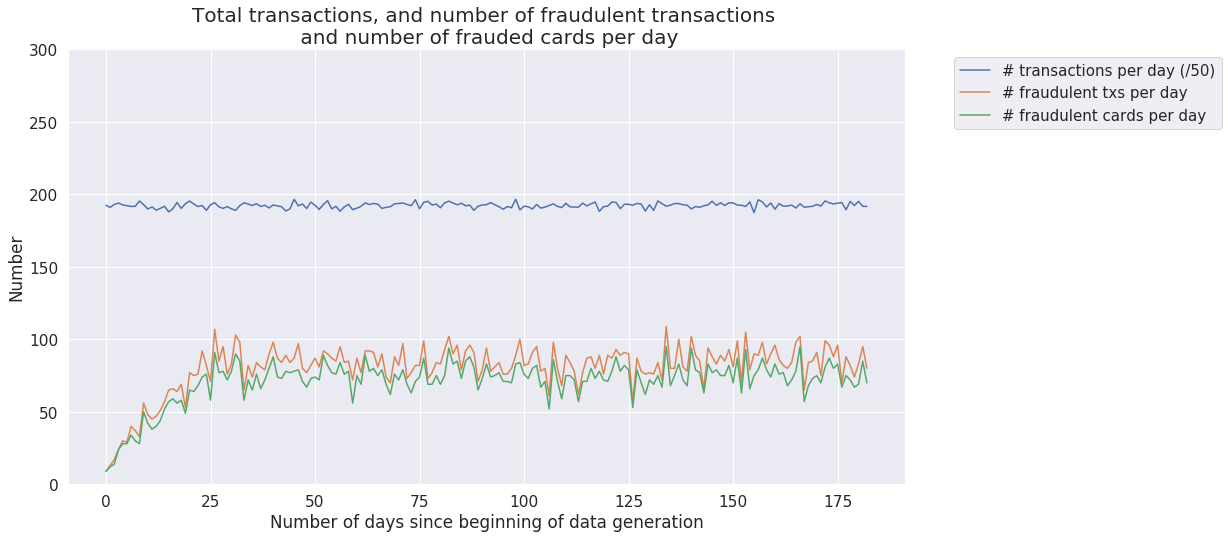

In [10]:
plot_transactions_stats(transactions_df)